<a href="https://colab.research.google.com/github/petrucianno/ASDA/blob/main/ASDA_Laborator_2_MAI201_Gurduza_Petru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Varianta #4
### Sarcina: 
* De studiat tema “Lanțul Markov”, de realizat codul ce calculează valorile probabilităților stărilor pe parcursul timpului, de verificat lucrul codului utilizând matricea schimbării timpului din prelegere (prezentarea, Timpul in Ottawa) și de descris experimentele in raport

### Functia de calculare a probabilitatilor utilizand Lantul Markov

In [2]:
def markov_calc(tranz_mat, initial, num_estimations):
  tranz_mat = np.array(tranz_mat)
  # check conditions for transition matrix (sum of all elements in row is 1)
  for i in range(len(tranz_mat)):
    if not np.isclose(sum(tranz_mat[i]), 1):
      raise Exception("Matricea de tranzitie este incorecta")
  # check if sum of all elements in vector with initial is 1
  if not np.isclose(sum(initial), 1):
    raise Exception("Valorile initiale sunt incorecte")

  estim_arr = [[*initial]]
  for est_idx in range(0, num_estimations):  
    estim_arr.append([*np.dot(tranz_mat.T, estim_arr[est_idx])])

  return np.array(estim_arr)


### Vremea in Ottawa

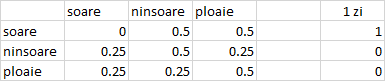

In [3]:
# matricea de tranzitie
mat = np.array([
    [0, .5, .5], 
    [.25, .5, .25], 
    [.25, .25, .5]
  ])
# vremea initiala
inits = np.identity(len(mat))

results = []
for init in inits:
  results.append(markov_calc(mat, init, 20))
results = np.array(results)

markov_calc(mat, inits[0], 20)

array([[1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.25      , 0.375     , 0.375     ],
       [0.1875    , 0.40625   , 0.40625   ],
       [0.203125  , 0.3984375 , 0.3984375 ],
       [0.19921875, 0.40039062, 0.40039062],
       [0.20019531, 0.39990234, 0.39990234],
       [0.19995117, 0.40002441, 0.40002441],
       [0.20001221, 0.3999939 , 0.3999939 ],
       [0.19999695, 0.40000153, 0.40000153],
       [0.20000076, 0.39999962, 0.39999962],
       [0.19999981, 0.4000001 , 0.4000001 ],
       [0.20000005, 0.39999998, 0.39999998],
       [0.19999999, 0.40000001, 0.40000001],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ],
       [0.2       , 0.4       , 0.4       ]])

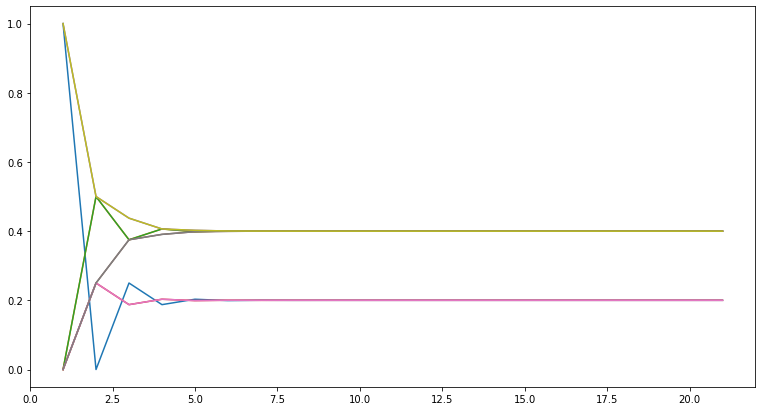

In [4]:

iterations = list(range(1, len(results[0].T[0]) + 1 ))

fig, ax = plt.subplots(figsize=(13, 7))
# plt.xticks(iterations, iterations)

for result_exp in results:
  for result_prob in result_exp.T:
    ax.plot(iterations, result_prob)


### Experiment cu diferite stari initiale

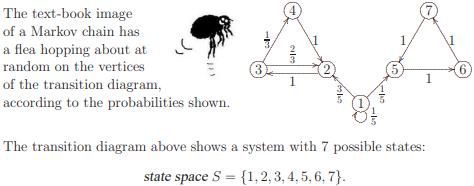

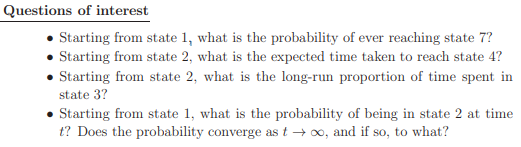

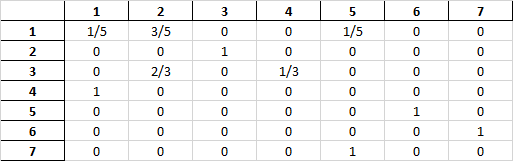

### Afisarea grafica a rezultatelor primite

Incepand din starea 1, dupa prima iteratie: [0.2 0.6 0.  0.  0.2 0.  0. ]


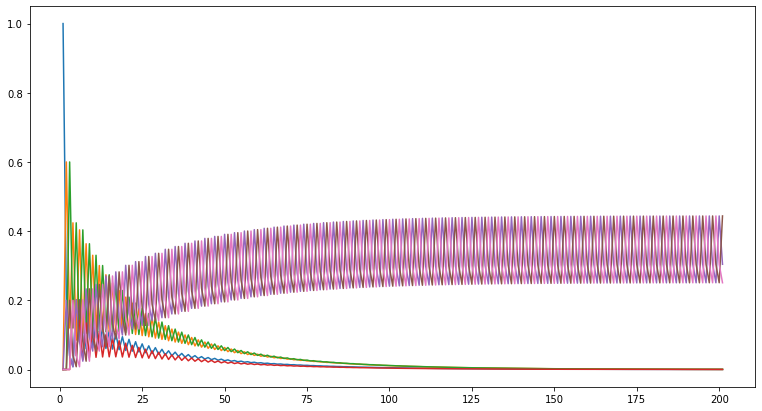

In [5]:
mat_inc = np.array([
    [1/5, 3/5, 0, 0, 1/5, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 2/3, 0, 1/3, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0]
  ])

# starile initiale pentru matricea 
# inits = np.identity(len(mat_inc))
inits = np.array([
    [1, 0, 0, 0, 0, 0, 0], # conditia 1
  ])
results = []
for init in inits:
  results.append(markov_calc(mat_inc, init, 200))
results = np.array(results)

iterations = list(range(1, len(results[0].T[0]) + 1 ))

fig, ax = plt.subplots(figsize=(13, 7))
# plt.xticks(iterations, iterations)

for result_exp in results:
  for result_prob in result_exp.T:
    ax.plot(iterations, result_prob)

print("Incepand din starea 1, dupa prima iteratie:", results[0][1])

Incepand din starea 2, dupa prima iteratie: [0. 0. 1. 0. 0. 0. 0.]


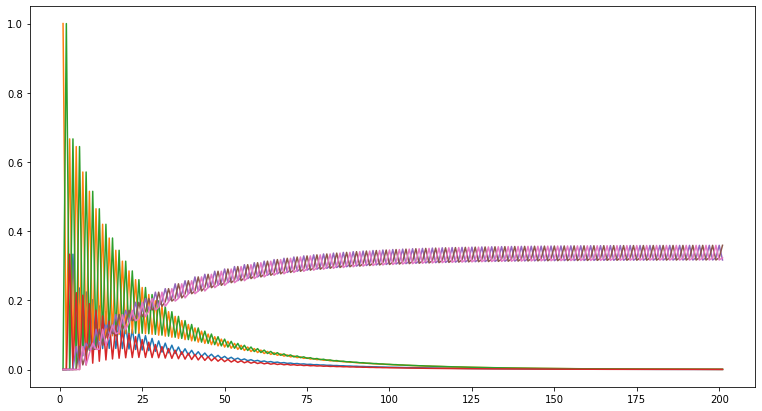

In [6]:
mat_inc = np.array([
    [1/5, 3/5, 0, 0, 1/5, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 2/3, 0, 1/3, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0]
  ])

# starile initiale pentru matricea 
# inits = np.identity(len(mat_inc))
inits = np.array([
    [0, 1, 0, 0, 0, 0, 0], # conditia 2 si 3
  ])
results = []
for init in inits:
  results.append(markov_calc(mat_inc, init, 200))
results = np.array(results)

iterations = list(range(1, len(results[0].T[0]) + 1 ))

fig, ax = plt.subplots(figsize=(13, 7))
# plt.xticks(iterations, iterations)

for result_exp in results:
  for result_prob in result_exp.T:
    ax.plot(iterations, result_prob)

print("Incepand din starea 2, dupa prima iteratie:", results[0][1])

# Concluzie
* Din experimentele efectuate observam ca pentru unele matrici de tranzitii exista exista convergenta aproximativ dupa acelasi numar de iteratii indiferent de starea initiala, dar sunt si matrici de tranzitie in care nu este convergenta pentru o anumita stare. 
* Mai observam ca pentru matricea de tranzitii pentur care nu exista o stare de convergenta, valoarea initiala joaca un rol important fata de rezultatele obtinute dupa un numar mare de iteratii
* Observam si faptul ca pentru a 2-a matrice de tranzitii, starile finale in care probabilitatile sunt diferite de 0 sunt 5, 6 si 7. Acest lucru se datoreaza faptului ca se formeaza o bucla din care nu se poate de trecut in alte stari in afara de cele enumerate